In [ ]:
# Install OpenCV and Tesseract
!apt install tesseract-ocr -y
!pip install pytesseract opencv-python-headless


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow


Saving download (2).jpg to download (2).jpg


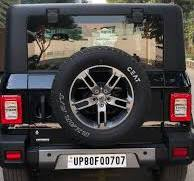

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the uploaded image
for filename in uploaded.keys():
    image_path = filename

image = cv2.imread(image_path)
cv2_imshow(image)


In [ ]:
# Download pre-trained Haar Cascade for Russian plate numbers (works for similar fonts too)
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml


--2025-05-05 09:14:30--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75482 (74K) [text/plain]
Saving to: ‘haarcascade_russian_plate_number.xml.2’

haarcascade_russian 100%[===================>]  73.71K  --.-KB/s    in 0.004s  

2025-05-05 09:14:30 (16.9 MB/s) - ‘haarcascade_russian_plate_number.xml.2’ saved [75482/75482]



In [ ]:
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')


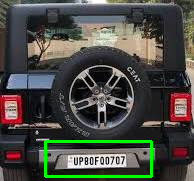

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(25,25))

for (x, y, w, h) in plates:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plate_img = image[y:y+h, x:x+w]

cv2_imshow(image)


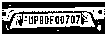

In [ ]:
if len(plates) > 0: # Changed plates.size to len(plates)
    roi_gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    roi_thresh = cv2.adaptiveThreshold(roi_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)
    cv2_imshow(roi_thresh)
else:
    print("No plate detected.")